# CNN



In [1]:
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Load the CSV file
file_path = 'fingerVSConfig_for_CNN.csv'
data = pd.read_csv(file_path)


In [2]:
# Filter data for each finger type and configuration
finger_large = data[data['Finger Type'] == 'Finger_Large']
finger_small_1 = data[data['Finger Type'] == 'Finger_Small_1']
finger_small_2 = data[data['Finger Type'] == 'Finger_Small_2']

# Extract relevant columns
theta6_large = finger_large['Theta6']
theta6_small_1 = finger_small_1['Theta6']
theta6_small_2 = finger_small_2['Theta6']

In [3]:
finger_large

,Finger Type,Pressure,Theta6,Unnamed: 3,Configuration,Pressure.1,Theta6.1
0,Finger_Large,0.00,0.78,NaN,DS20DS20_0_1,0.000000,-3.685265
1,Finger_Large,2.07,3.90,NaN,DS20DS20_0_1,2.151899,-3.661200
2,Finger_Large,4.15,4.71,NaN,DS20DS20_0_1,4.303797,-3.637136
3,Finger_Large,6.22,5.49,NaN,DS20DS20_0_1,6.455696,-3.282762
4,Finger_Large,8.29,6.45,NaN,DS20DS20_0_1,8.607595,-2.928387
...,...,...,...,...,...,...,...
160,Finger_Large,331.71,57.63,NaN,DS20DS20_0_1,331.392405,51.909976
161,Finger_Large,333.78,57.68,NaN,DS20DS20_0_1,333.544304,52.024568
162,Finger_Large,335.85,57.82,NaN,DS20DS20_0_1,335.696203,52.139159
163,Finger_Large,337.93,57.81,NaN,DS20DS20_0_1,337.848101,52.110511


In [4]:
# Extract corresponding configurations
ds20_large = finger_large[finger_large['Configuration'] == 'DS20DS20_0_1']['Theta6.1']
ds30_small_1 = finger_small_1[finger_small_1['Configuration'] == 'DS30DS30_0_2']['Theta6.1']
ds30_small_2 = finger_small_2[finger_small_2['Configuration'] == 'DS30DS30_0_2']['Theta6.1']


In [5]:
print(ds30_small_1)
print(ds30_small_2)

166    -3.673805
167    -3.568095
168    -3.422742
169    -3.303818
170    -2.313131
         ...    
295    48.028187
296    48.060416
297    48.071159
298    48.071159
299    48.071159
Name: Theta6.1, Length: 134, dtype: float64
301    -3.673805
302    -3.462384
303    -3.250963
304    -1.375299
305     0.364743
         ...    
379    47.899272
380    47.985215
381    48.071159
382    48.071159
383    48.071159
Name: Theta6.1, Length: 83, dtype: float64


In [6]:
# Remove the columns after Theta6
finger_large = finger_large.iloc[:, :3]
finger_small_1 = finger_small_1.iloc[:, :3]
finger_small_2 = finger_small_2.iloc[:, :3]

In [7]:
finger_large

,Finger Type,Pressure,Theta6
0,Finger_Large,0.00,0.78
1,Finger_Large,2.07,3.90
2,Finger_Large,4.15,4.71
3,Finger_Large,6.22,5.49
4,Finger_Large,8.29,6.45
...,...,...,...
160,Finger_Large,331.71,57.63
161,Finger_Large,333.78,57.68
162,Finger_Large,335.85,57.82
163,Finger_Large,337.93,57.81


In [8]:

# Calculate metrics
metrics = {
    'Comparison': [],
    'R2': [],
    'MSE': [],
    'RMSE': [],
    'MAE': []
}

# Function to calculate metrics
def calculate_metrics(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    return r2, mse, rmse, mae


In [9]:

# Calculate metrics for 'Finger_Large VS DS20DS20_0_1'
r2, mse, rmse, mae = calculate_metrics(theta6_large, ds20_large)
metrics['Comparison'].append('Finger_Large VS DS20DS20_0_1')
metrics['R2'].append(r2)
metrics['MSE'].append(mse)
metrics['RMSE'].append(rmse)
metrics['MAE'].append(mae)

# Calculate metrics for 'Finger_Small_1 VS DS30DS30_0_2'
r2, mse, rmse, mae = calculate_metrics(theta6_small_1, ds30_small_1)
metrics['Comparison'].append('Finger_Small_1 VS DS30DS30_0_2')
metrics['R2'].append(r2)
metrics['MSE'].append(mse)
metrics['RMSE'].append(rmse)
metrics['MAE'].append(mae)

# Calculate metrics for 'Finger_Small_2 VS DS30DS30_0_2'
r2, mse, rmse, mae = calculate_metrics(theta6_small_2, ds30_small_2)
metrics['Comparison'].append('Finger_Small_2 VS DS30DS30_0_2')
metrics['R2'].append(r2)
metrics['MSE'].append(mse)
metrics['RMSE'].append(rmse)
metrics['MAE'].append(mae)

metrics_df = pd.DataFrame(metrics)
metrics_df


,Comparison,R2,MSE,RMSE,MAE
0,Finger_Large VS DS20DS20_0_1,0.920812,23.904005,4.889172,4.338990
1,Finger_Small_1 VS DS30DS30_0_2,0.884177,20.231950,4.497994,3.580157
2,Finger_Small_2 VS DS30DS30_0_2,0.890128,21.068334,4.590025,3.936104


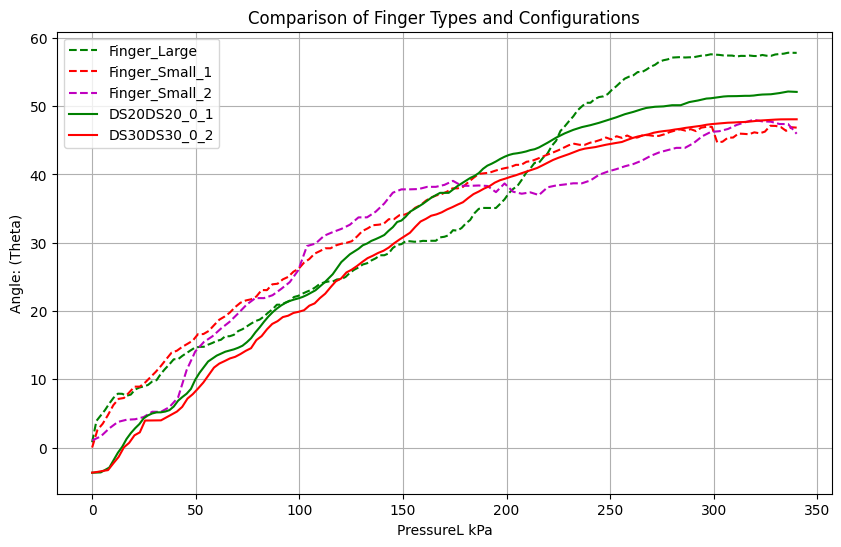

In [37]:
import matplotlib.pyplot as plt

# Plotting the graphs
plt.figure(figsize=(10, 6))

# Finger_Large
plt.plot(finger_large['Pressure'], finger_large['Theta6'], 'g--', label='Finger_Large')

# Finger_Small_1
plt.plot(finger_small_1['Pressure'], finger_small_1['Theta6'], 'r--', label='Finger_Small_1')

# Finger_Small_2
plt.plot(finger_small_2['Pressure'], finger_small_2['Theta6'], 'm--', label='Finger_Small_2')

# DS20DS20_0_1
plt.plot(finger_large['Pressure'], ds20_large, 'g-', label='DS20DS20_0_1')

# DS30DS30_0_2
plt.plot(finger_small_1['Pressure'], ds30_small_1, 'r-', label='DS30DS30_0_2')

plt.xlabel('PressureL kPa')
plt.ylabel('Angle: (Theta)')
plt.title('Comparison of Finger Types and Configurations')
plt.legend()
plt.grid(True)
plt.show()


# DNN

In [21]:
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Load the CSV file
file_path = 'fingerVSConfig_for_DNN.csv'
data = pd.read_csv(file_path)

In [40]:
# Filter data for each finger type and configuration
finger_large = data[data['Finger Type'] == 'Finger_Large']
finger_small_1 = data[data['Finger Type'] == 'Finger_Small_1']
finger_small_2 = data[data['Finger Type'] == 'Finger_Small_2']

# Extract relevant columns
theta6_large = finger_large['Theta6']
theta6_small_1 = finger_small_1['Theta6']
theta6_small_2 = finger_small_2['Theta6']

In [41]:
finger_large

,Finger Type,Pressure,Theta6,Unnamed: 3,Configuration,Pressure.1,Theta6.1,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,Finger_Large,0.00,0.78,NaN,DS30DS30_0_1,0.000,-3.585570,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Finger_Large,2.07,3.90,NaN,DS30DS30_0_1,2.125,-3.579554,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Finger_Large,4.15,4.71,NaN,DS30DS30_0_1,4.250,-3.573538,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Finger_Large,6.22,5.49,NaN,DS30DS30_0_1,6.375,-3.567522,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Finger_Large,8.29,6.45,NaN,DS30DS30_0_1,8.500,-3.561506,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,Finger_Large,331.71,57.63,NaN,DS30DS30_0_1,331.500,55.118540,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161,Finger_Large,333.78,57.68,NaN,DS30DS30_0_1,333.625,55.118540,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,Finger_Large,335.85,57.82,NaN,DS30DS30_0_1,335.750,55.118540,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163,Finger_Large,337.93,57.81,NaN,DS30DS30_0_1,337.875,55.118540,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# Extract corresponding configurations
ds30_large = finger_large[finger_large['Configuration'] == 'DS30DS30_0_1']['Theta6.1']
ds30_small_1 = finger_small_1[finger_small_1['Configuration'] == 'DS30DS30_0_1']['Theta6.1']
ds30_small_2 = finger_small_2[finger_small_2['Configuration'] == 'DS30DS30_0_2']['Theta6.1']

In [43]:
print(ds30_small_1)
print(ds30_small_2)

166    -3.585570
167    -3.579554
168    -3.570530
169    -3.058091
170    -2.880259
         ...    
295    55.018272
296    55.055873
297    55.118540
298    55.118540
299    55.118540
Name: Theta6.1, Length: 134, dtype: float64
301    -3.673805
302    -3.462384
303    -3.250963
304    -1.375299
305     0.364743
         ...    
379    47.899272
380    47.985215
381    48.071159
382    48.071159
383    48.071159
Name: Theta6.1, Length: 83, dtype: float64


In [44]:
# Remove the columns after Theta6
finger_large = finger_large.iloc[:, :3]
finger_small_1 = finger_small_1.iloc[:, :3]
finger_small_2 = finger_small_2.iloc[:, :3]

In [45]:
finger_large

,Finger Type,Pressure,Theta6
0,Finger_Large,0.00,0.78
1,Finger_Large,2.07,3.90
2,Finger_Large,4.15,4.71
3,Finger_Large,6.22,5.49
4,Finger_Large,8.29,6.45
...,...,...,...
160,Finger_Large,331.71,57.63
161,Finger_Large,333.78,57.68
162,Finger_Large,335.85,57.82
163,Finger_Large,337.93,57.81


In [49]:
# Calculate metrics
metrics = {
    'Comparison': [],
    'R2': [],
    'MSE': [],
    'RMSE': [],
    'MAE': []
}

# Function to calculate metrics
def calculate_metrics(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    return r2, mse, rmse, mae


In [50]:
# Calculate metrics for 'Finger_Large VS DS30DS30_0_1'
r2, mse, rmse, mae = calculate_metrics(theta6_large, ds30_large)
metrics['Comparison'].append('Finger_Large VS DS30DS30_0_1')
metrics['R2'].append(r2)
metrics['MSE'].append(mse)
metrics['RMSE'].append(rmse)
metrics['MAE'].append(mae)

# Calculate metrics for 'Finger_Small_1 VS DS30DS30_0_1'
r2, mse, rmse, mae = calculate_metrics(theta6_small_1, ds30_small_1)
metrics['Comparison'].append('Finger_Small_1 VS DS30DS30_0_1')
metrics['R2'].append(r2)
metrics['MSE'].append(mse)
metrics['RMSE'].append(rmse)
metrics['MAE'].append(mae)

# Calculate metrics for 'Finger_Small_2 VS DS30DS30_0_2'
r2, mse, rmse, mae = calculate_metrics(theta6_small_2, ds30_small_2)
metrics['Comparison'].append('Finger_Small_2 VS DS30DS30_0_2')
metrics['R2'].append(r2)
metrics['MSE'].append(mse)
metrics['RMSE'].append(rmse)
metrics['MAE'].append(mae)

metrics_df = pd.DataFrame(metrics)
metrics_df

,Comparison,R2,MSE,RMSE,MAE
0,Finger_Large VS DS30DS30_0_1,0.924311,22.847752,4.779932,4.008758
1,Finger_Small_1 VS DS30DS30_0_1,0.808172,33.508437,5.788647,5.174649
2,Finger_Small_2 VS DS30DS30_0_2,0.890128,21.068334,4.590025,3.936104


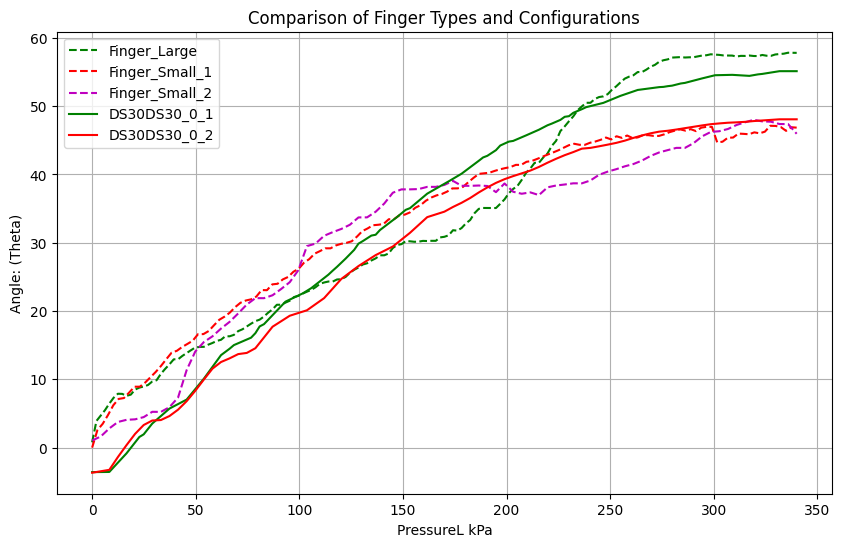

In [51]:
import matplotlib.pyplot as plt

# Plotting the graphs
plt.figure(figsize=(10, 6))

# Finger_Large
plt.plot(finger_large['Pressure'], finger_large['Theta6'], 'g--', label='Finger_Large')

# Finger_Small_1
plt.plot(finger_small_1['Pressure'], finger_small_1['Theta6'], 'r--', label='Finger_Small_1')

# Finger_Small_2
plt.plot(finger_small_2['Pressure'], finger_small_2['Theta6'], 'm--', label='Finger_Small_2')

# DS30DS30_0_1
plt.plot(finger_large['Pressure'], ds30_large, 'g-', label='DS30DS30_0_1')

# DS30DS30_0_2
plt.plot(finger_small_2['Pressure'], ds30_small_2, 'r-', label='DS30DS30_0_2')

plt.xlabel('PressureL kPa')
plt.ylabel('Angle: (Theta)')
plt.title('Comparison of Finger Types and Configurations')
plt.legend()
plt.grid(True)
plt.show()
